# Fitting a Polynomial - Least Squares and Generalised Least Squares

We want to fit a straight line through a set of $N$ points $(x_i,y_i)$ with associated Gaussian errors $\sigma_i$ in $y$. We define:

\begin{equation}
Y = 
     \begin{bmatrix}
      y_{1} \\
      y_{2} \\
      \vdots \\
      y_{N} \\ 
    \end{bmatrix}
\end{equation}

\begin{equation}
A = 
     \begin{bmatrix}
      1 & x_{1} \\
      1 & x_{2} \\
      \vdots \\
      1 & x_{N} \\ 
    \end{bmatrix}
\end{equation}

and we want to find $X$ defined as:

\begin{equation}
X = 
     \begin{bmatrix}
      b \\
      m \\ 
    \end{bmatrix}
\end{equation}

which is the solution to the system of equations:

\begin{equation}
    \begin{cases} y_1=b+mx_{1} \\ y_2=b+mx_{2} \\ ... \\ y_N=b+mx_{N} \end{cases} \Leftrightarrow  Y=AX 
\end{equation}

If there are three or more points, the system does not necessarily have a solution. The system of equations is overconstrained, since we have more equations (points) than unknowns (free parameters), the matrix $A$ has more rows than columns. We cannot find values of $b$ and $m$ to make the error $e=Y-AX$ equal to zero, but we can try to nake it as small as possible.

We want to find $b$ and $m$ that minimise the distance between the line and the points. This distance can be represented with the following function:

\begin{equation}
\chi^2 = \displaystyle\sum_{i=1}^{N} \frac{ [y_i - f(x_i)]^2}{\sigma^{2}_{yi}} 
\end{equation}

which in vector/matrix form can be written as:

\begin{equation}
C = 
     \begin{bmatrix}
      \sigma^{2}_{y1} & 0 & \cdots & 0 \\
      0 & \sigma^{2}_{y2} & \cdots & 0 \\
       & & \cdots & \\ 
      0 & 0 & 0 & \sigma^{2}_{yN}
    \end{bmatrix}
\end{equation}

\begin{equation}
\chi^2 = \displaystyle\sum_{i=1}^{N} \frac{ [y_i - f(x_i)]^2}{\sigma^{2}_{yi}} = [Y-AX]^T C ^{-1} [Y-AX]
\end{equation}

with the analytic solution:

$X = [A^T C^{-1} A] ^{-1} A^T C^{-1} Y$

<font color='blue'>in the special case where all uncertainties are identical and $C$ has no off-diagonal terms (meaning the points are uncorrelated) we are in the case called Ordinary Least Squares (OLS):</font>

<font color='blue'>$X = [A^T A] ^{-1} A^T Y = \texttt{scipy.linalg.lstsq(A, y)}$</font>

The covariance matrix for $X$ (which contains the uncertainty on $b$, on $m$, and the correlation between those parameters) has an analytic solution:

\begin{equation}
     \begin{bmatrix}
        \sigma^{2}_{b} & \rho_{bm}\sigma_{b}\sigma_{m} \\
        \rho_{mb}\sigma_{b}\sigma_{m} &  \sigma^{2}_{m} \\
     \end{bmatrix} = [A^T C ^{-1} A] ^{-1}
\end{equation}

<font color='blue'>which in the special case where all uncertainties are $\sigma$ and the points are uncorrelated is: $\sigma^2 [A^T A] ^{-1}$</font>

This covariance matrix actually *only* exists if the system is overconstrained. If $A$ does not have more rows than columns then you will be able to find $X$ that allows you to go through all of your points, and the covariance matrix of $X$ will be undefined.

This procedure can be applied to higher-order polynomials by simply constructing $A$ and $X$ to represent the system of equations you aim for. For instance, for a quadratic fit:

\begin{equation}
A = 
     \begin{bmatrix}
      1 & x_{1} & x^{2}_{1}\\
      1 & x_{2} & x^{2}_{2}\\
      \vdots \\
      1 & x_{N} & x^{2}_{N}\\ 
    \end{bmatrix}
\end{equation}

and

\begin{equation}
X = 
     \begin{bmatrix}
      b \\
      m \\ 
      q \\
    \end{bmatrix}
\end{equation}

will find a solution in the form: $b + mx + qx^2$.

## Example of a second-order polynomial with homogeneous uncertainties: <font color='blue'>ordinary least squares (OLS)</font>

(=homoskedastic)

The solution to $AX=Y$ is  <font color='blue'>$X = [A^T A] ^{-1} A^T Y$</font>

Note that if the uncertainties are not homogeneous (i.e. in the heteroskedastic case) we would compute the solution as $X = [A^T C^{-1} A] ^{-1} A^T C^{-1} Y$ and the covariance of the solution as $[A^T C ^{-1} A] ^{-1}$, I don't know if there is a ``numpy`` or ``scipy`` function to do it directly but we can still compute it in one long line.

Result from scipy.linalg.lstsq(A, y):
[2.05343396 2.23599098 0.40866312]
Result from np.dot( np.dot( np.linalg.inv( np.dot(A.T,A) ) , A.T ) , y ):
[2.05343396 2.23599098 0.40866312]
True value:
[1, 2, 0.5]


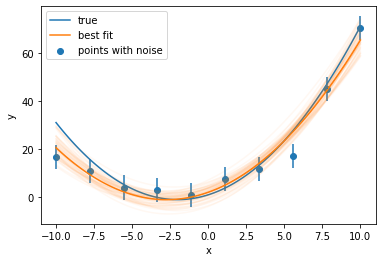

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

sigma = 5 # Gaussian uncertainty

x = np.linspace( -10 , 10 , 10 )
y = 0.5*x**2 + 2*x + 1 + sigma*np.random.normal(size=len(x))

xtoplot = np.linspace(-10,10,100)
ytrue = 0.5*xtoplot**2 + 2*xtoplot + 1 


plt.plot( xtoplot , ytrue , label='true')
plt.scatter( x , y , label='points with noise')
plt.errorbar( x , y , yerr=sigma , fmt=',', color='C0')
plt.xlabel('x')
plt.ylabel('y')

# Construct the matrix A to represent the second-order polynomial:
A = np.c_[ np.ones(x.shape), x , x**2]
# Solve the equation:
X_OLS,_,_,_ = scipy.linalg.lstsq(A, y)
directX_OLS = np.dot( np.dot( np.linalg.inv( np.dot(A.T,A) ) , A.T ) , y )
variance_of_X_OLS = sigma**2 * np.linalg.inv( np.dot(A.T,A) )

# Plot the result:
yBestFit = X_OLS[2]*xtoplot**2 + X_OLS[1]*xtoplot + X_OLS[0] 
plt.plot( xtoplot , yBestFit , label='best fit')
plt.legend()

# Pick random combinations to show the range of uncerainty:
for redraw in range(50):
    X_redrawn = np.random.multivariate_normal(X_OLS,variance_of_X_OLS)
    y_redrawn = X_redrawn[2]*xtoplot**2 + X_redrawn[1]*xtoplot + X_redrawn[0]
    plt.plot( xtoplot , y_redrawn , alpha=0.05 , c='C1')

print('Result from scipy.linalg.lstsq(A, y):')
print(X_OLS)
print('Result from np.dot( np.dot( np.linalg.inv( np.dot(A.T,A) ) , A.T ) , y ):')
print(directX_OLS)
print('True value:')
print([1,2,0.5])

## General case with a full covariance matrix: Generalised Least Squares (GLS)

Ordinary Least Squares (with homoskedastic data) and Weighted Least Squares (with heteroskedastic but uncorrelated data) are special cases of the more generic Generalised Least Squares. We can still solve the problem if the covariance matrix $C$ has off-diagonal terms, by turning the problem into a "decorrelated" one.

https://en.wikipedia.org/wiki/Generalized_least_squares#Method_outline

To do that we first need to extract something from $C$: we want its Cholesky decomposition $C=L L^T$. We can get $L$ with ``L = np.linalg.cholesky(C)``.

If we replace $A$ with $L^T A$ and $Y$ with $L^T Y$ we can solve the problen in one line: ``scipy.linalg.lstsq(np.dot(L.T,A),np.dot(L.T,y))``

Result for X_GLS:
[3.21689552 2.44901185 0.49294314]
True value:
[1, 2, 0.5]
Covariance of best-fit parameters:
[[ 7.03211649e-01  6.06723925e-17  1.04060160e-02]
 [-4.54087980e-17  8.00000000e-02 -9.07157292e-18]
 [ 1.04060160e-02 -1.76269274e-18  4.43323188e-03]]


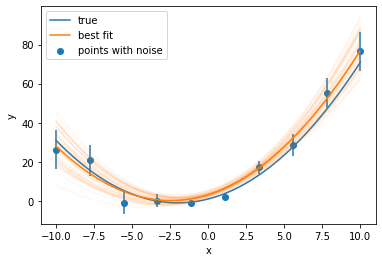

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

x = np.linspace( -10 , 10 , 10 )
sigma = np.abs(x) # now some points have larger uncertainties than others
rho = 0.2 # to impose correlated errors

# Here we create a covariance matrix from those uncertainties:
C = np.zeros(shape=(len(x),len(x)))
for i in range(len(x)):
        for j in range(len(x)):
                if i==j:
                        C[i][j] = sigma[i]**2
                else:
                        C[i][j] = sigma[i]*sigma[j] * rho

# Add Gaussian errors:
y = 0.5*x**2 + 2*x + 1 + np.random.multivariate_normal(np.zeros(len(x)),C)
# If rho!=0 the errors will be correlated. 
# With a positive value for rho, they will tend to be on the same side of the true value
# i.e. all overestinated or all underestimated.
xtoplot = np.linspace(-10,10,100)
ytrue = 0.5*xtoplot**2 + 2*xtoplot + 1 
plt.plot( xtoplot , ytrue , label='true')
plt.scatter( x , y , label='points with noise')
plt.errorbar( x , y , yerr=sigma , fmt=',', color='C0')
plt.xlabel('x')
plt.ylabel('y')

# Solve:
L = np.linalg.cholesky(C)
X_GLS,_,_,_ = scipy.linalg.lstsq(np.dot(L.T,A),np.dot(L.T,y))
variance_of_X_GLS = np.linalg.inv( np.dot( np.dot(A.T,np.linalg.inv(C)) , A ) )

# Plot the result:
yBestFit = X_GLS[2]*xtoplot**2 + X_GLS[1]*xtoplot + X_GLS[0] 
plt.plot( xtoplot , yBestFit , label='best fit')
plt.legend()

# Pick random combinations to show the range of uncerainty:
for redraw in range(50):
    X_redrawn = np.random.multivariate_normal(X_GLS,variance_of_X_GLS)
    y_redrawn = X_redrawn[2]*xtoplot**2 + X_redrawn[1]*xtoplot + X_redrawn[0]
    plt.plot( xtoplot , y_redrawn , alpha=0.05 , c='C1')

print('Result for X_GLS:')
print(X_GLS)
print('True value:')
print([1,2,0.5])
print('Covariance of best-fit parameters:')
print(variance_of_X_GLS)